# Intro

Decision tree (DT) is a non-linear ML model that can do regression or classification based on tree sturcture. The main idea of DT model is :
*** maximize the Information gain (IG)*** within every iteration.

- *** IG ***


$$
\begin{equation}
IG(D_p, f)=\Delta I=I(D_p)-\sum_{j=1}^{m}\frac{N_j}{N_p}I(D_j)\ ,
\end{equation}
$$


There are 3 impurity caculation methods:
 - Gini impurity $(I_{G})$ 
 
$$
\begin{equation}
I_{G}(t)=\sum_{i=1}^{c}p(i|t)\left(1-p(i|t)\right)\ 
\end{equation}
$$ 
 - Entropy $(I_{E})$
 
$$
\begin{equation}
I_{E}(t)=-\sum_{i=1}^{c}p(i|t)\log_{2}{p(i|t)}\ .
\end{equation}
$$
 - Classification error $(I_{\epsilon})$
 
$$
\begin{equation}
I_{\epsilon}(t)=1-\max{\left\{p(i|t)\right\}}\ .
\end{equation}
$$



- Information gain (IG) 
    - entropy(parent) - sum(entropy(children))
    
    
- Gini impurity :
    - Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Gini impurity can be computed by summing the probability ${\displaystyle p_{i}}$ of an item with label ${\displaystyle i}$  being chosen times the probability ${\displaystyle \sum _{k\neq i}p_{k}=1-p_{i}}$ 



- Entropy : 
    - randomness of a dataset (randomness ↑ => entropy ↑), 
      ***p(i|t)*** are fractions that add up to 1 and represent thepercentage of       each class present in the child node that results from a split in the tree


- Tree structre : a top-down binary tree classification 
    that each parent has 2 child, each child as new parent and has 2 child     .. and so on, finally can classify data into several groups based on some criterions.  
 

In [71]:
# analysis library
import pandas as pd, numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

# ML
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


## 1) DT model demo (decision tree)

In [70]:
# Entropy VS  Entropy (scaled) VS  Gini Impurity

In [73]:
# plot style 
plt.style.use('classic')
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)


## 2)  Tuning  DT 

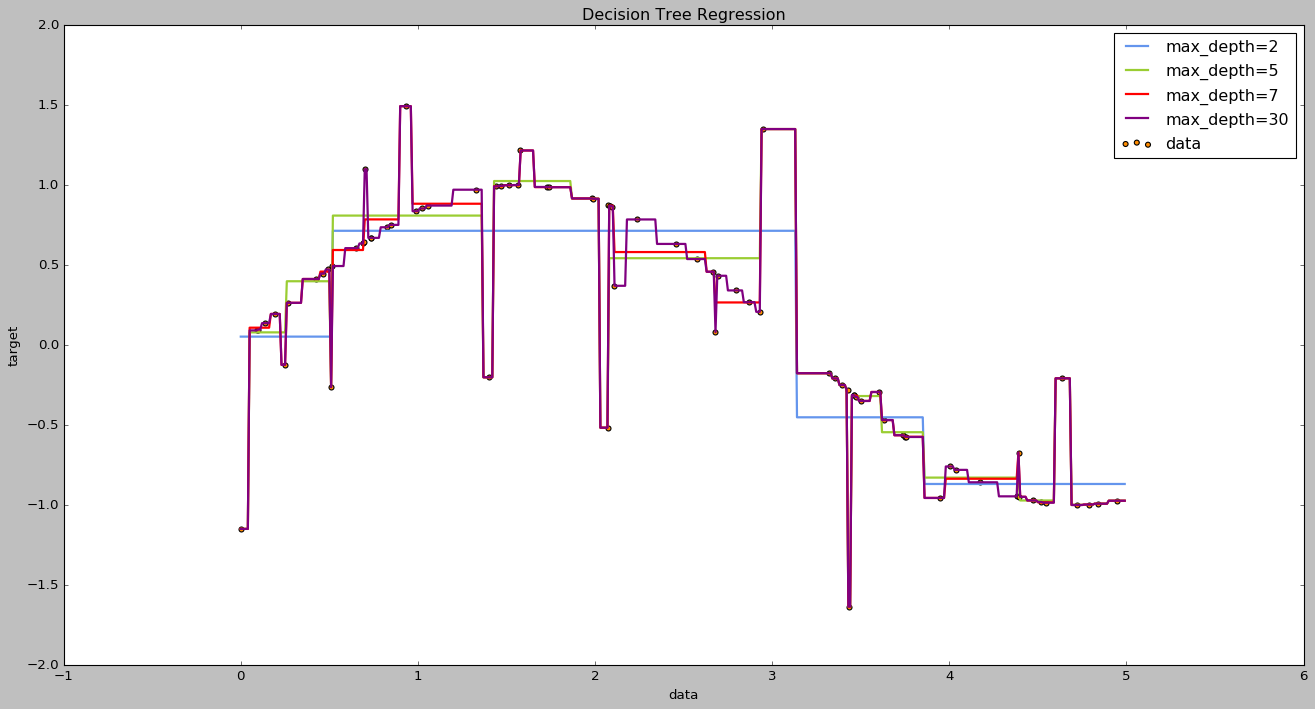

In [76]:
# DT regression 

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=7)
regr_4 = DecisionTreeRegressor(max_depth=30)

regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)
regr_4.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)
y_4 = regr_4.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.plot(X_test, y_3, color="red", label="max_depth=7", linewidth=2)
plt.plot(X_test, y_4, color="purple", label="max_depth=30", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [81]:
# DT classifier 


def data_preprocess(X,y):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2 )
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    return X_train_std,X_test_std ,X_train, X_test, y_train, y_test


# load iris data 

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
# pre-process data 
X_train_std,X_test_std,X_train, X_test, y_train, y_test = data_preprocess(X,y)

In [68]:
#print(plt.style.available)

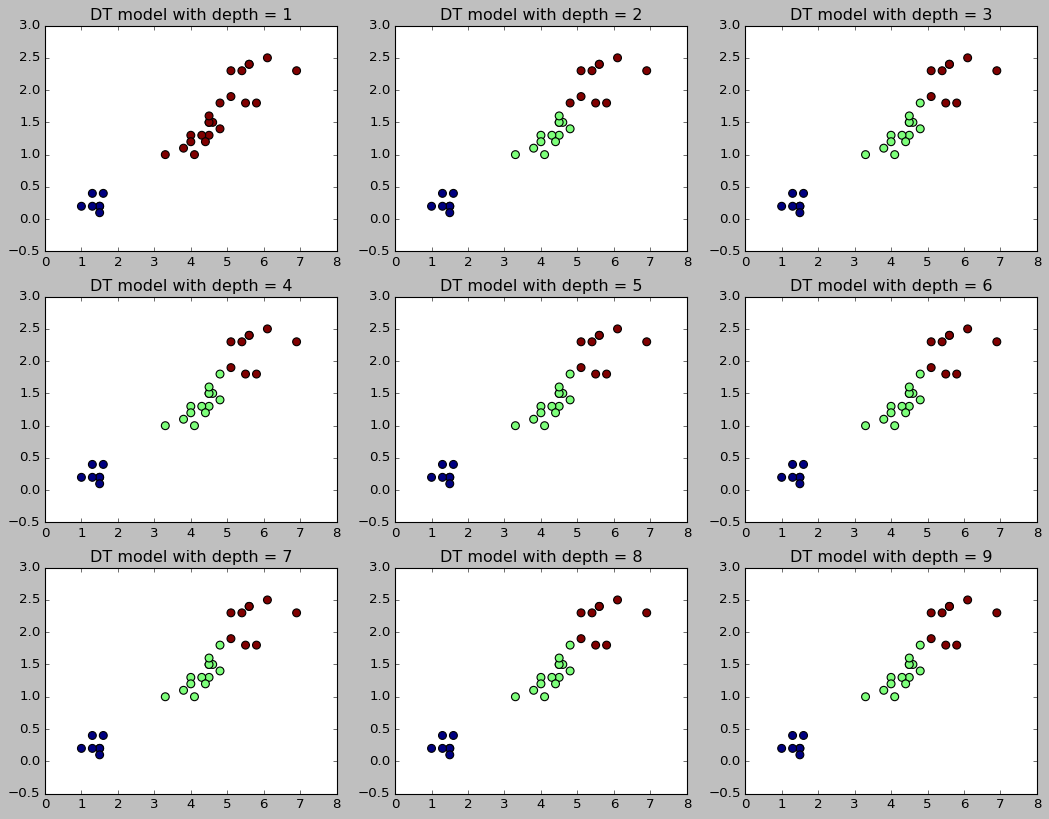

In [95]:
# fitting data with DT classifer  and plot output 
plt.style.use('seaborn-muted')
#matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

# https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111
# --------------------------------
# |subplot(2,1,1) |subplot(2,1,2)|
# |subplot(2,1,3) |subplot(2,1,4)|
# --------------------------------



N_d  = 8
r = int(N_d/4)
fig = plt.figure(figsize=(16, N_d*1.5))


for depth_ in range(1,10):
    fig.add_subplot( r if (N_d+2)%3 is 0 else r+1, 3, depth_ )
    DT_model = DecisionTreeClassifier(max_depth=depth_)
    DT_model.fit(X_train, y_train)
    plt.scatter(X_test[:,0:1],X_test[:,1:2],c=DT_model.predict(X_test),s=50)
    plt.title('DT model with depth = {}'.format(depth_))
    #print (DT_model.score(X_test,y_test))
plt.show()
    